# Chebyshev級数

Chebyshev級数とは、cosine Fourier級数に対し変換 $x=\cos\theta$ を与えたものである。$T_n (x):=\cos(n\theta)$, $\theta=\arccos(x)$ ($n$ 次の第一種Chebyshev多項式)を基底とした級数展開

$$ f(x)=\sum_{n=0}^{\infty}a_n T_n(x), \quad x\in[-1,1] $$

を**Chebyshev級数**という。これは変換 $x=\cos\theta$ と $T_n(x)$ の定義から

$$ f(\cos\theta)=\sum_{n=0}^{\infty}a_n \cos(n\theta),\quad \theta\in[0,2\pi] $$

となるため、$f(\cos\theta)$ という周期関数のFourier cosine級数である（係数の収束もフーリエ級数と同じ）。Chebyshev係数 $(a_n)_{n\ge 0}$ は

$$ a_n=
\begin{cases}
\displaystyle{\frac{1}{\pi} \int^{1}_{-1}\frac{f(x)T_0(x)}{\sqrt{1-x^2}}dx}, & n=0\\[2mm]
\displaystyle{\frac{2}{\pi} \int^{1}_{-1}\frac{f(x)T_n(x)}{\sqrt{1-x^2}}dx}, & n>0
\end{cases}
$$

で与えられる。 この係数 $(a_n)$ を **Two-sided Chebyshev係数**とよぶ。

**例**　$ T_n(x)=\cos n\theta$ なので $\cos0=1$, $\cos 1\theta=\cos\theta$, $\cos2\theta=2\cos^2\theta-1$, $\cos3\theta=4\cos^3\theta-3\cos\theta$, $\cos4\theta=8\cos^4\theta-8\cos^2\theta+1,...$ となる。これから

$$
\begin{align*}
T_0(x)&=1 \\
T_1(x)&=x \\
T_2(x)&=2x^2-1 \\
T_3(x)&=4x^3-3x \\
T_4(x)&=8x^4-8x^2+1\\
&~\vdots
\end{align*}
$$

という関係式を得ることができる。

Chebyshev多項式のもう一つの表現方法として、$|z|=1$ をみたす複素平面の単位円上で定義される複素変数 $z$ を用いる方法がある。いま

$$
F(z)\equiv f(x),\quad x=\frac{z+z^{-1}}{2}
$$

をみたすような複素関数 $F$ を考える。変換 $x=(z+z^{-1})/2$ は $x$ の1つの値に対して $z$ の2つの値 ($z$, $z^{-1}$) を対応させる。すなわち$F$ は $F(z)=F(z^{-1})$ の対称性が成り立つ。関数 $F$ のLaurent展開を考えると

$$ F(z) = F(z^{-1}) = \frac{1}{2}\sum_{n=0}^{\infty}a_n\left(z^{n}+z^{-n}\right), \quad |z| = 1.$$

よって $n$ 番目の Chebyshev 多項式 $T_n$ は、単位円上の変数 $z^{n}$ の実部で定義できて

$$ T_n\left(x\right) = \frac{1}{2}\left(z^{n}+z^{-n}\right),\quad n\ge 0 $$

と表すことができる。この表現方法は Chebyshev 多項式がみたす漸化式を簡潔に導くことを助けてくれる。
任意の $n \geq 1$ について

$$
\frac{1}{2}\left(z+z^{-1}\right)\left(z^{n}+z^{-n}\right)=
\frac{1}{2}\left(z^{n+1}+z^{-n-1}\right)+\frac{1}{2}\left(z^{n-1}+z^{-n+1}\right)
$$

が成り立つので、以下のような漸化式を得る。

$$
2xT_n\left(x\right) = T_{n+1}(x)+T_{n-1}(x)
\iff T_{n+1}\left(x\right) = 2xT_{n}\left(x\right)-T_{n-1}\left(x\right)
$$

この漸化式と $T_0(x)=1$, $T_1(x) = x$ という条件から、$T_n(x)$ を具体的に求めることができる。


$T_0(x)$ から $T_5(x)$ までを図示すると次のようになる。

In [1]:
versioninfo()

Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: macOS (arm64-apple-darwin21.2.0)
  CPU: Apple M1 Max
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, cyclone)


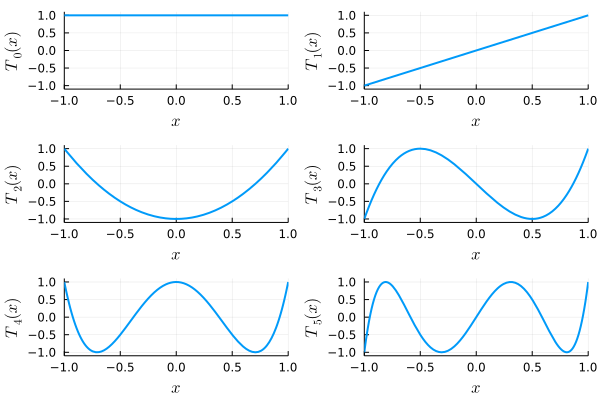

In [2]:
using ApproxFun, Polynomials, Plots

function T(n)
    return ChebyshevT([zeros(n);1.])
end

plot(
    plot(T(0), ylabel = "\$T_0(x)\$"),
    plot(T(1), ylabel = "\$T_1(x)\$"),
    plot(T(2), ylabel = "\$T_2(x)\$"),
    plot(T(3), ylabel = "\$T_3(x)\$"),
    plot(T(4), ylabel = "\$T_4(x)\$"),
    plot(T(5), ylabel = "\$T_5(x)\$"),
    layout    = (3, 2),
    line        = 2,
    color      = 2, 
    xlabel = "\$x\$",
    xlims      = (-1, 1),
    ylims      = (-1.1, 1.1),
    legend   = false
)

一般の定義域 $x\in[a,b]$ 上でのChebyshev多項式は

$$[a,b]\rightarrow [-1,1],\quad x\mapsto \xi=2\frac{x-a}{b-a}-1,$$

$$ [-1,1]\rightarrow[a,b],\quad \xi\mapsto x=\frac{1-\xi}{2}a+\frac{1+\xi}{2}b$$

という変換を使う。

<!--
あとで一般の定義域での構成方法を説明する？
-->

## Chebyshev級数の特徴1：対称性

上のプロットした図から明らかな通り、$T_n(x)$ は $n$ が偶数番目のとき偶関数、奇数番目の時奇関数となる。したがって、次の対称性が成り立つ。


- $f(x)=f(-x)$ (偶関数)の場合、$a_n$の偶数番目($\cos(2n\theta)$, $n=0,1,...$) だけ必要。
- $f(x)=-f(-x)$ (奇関数)の場合、$a_n$の奇数番目($\cos((2n-1)\theta)$, $n=1,2,...$) だけ必要。


## Chebyshev級数の特徴2：Chebyshev点

区間 $[-1,1]$ 上の点

$$ x_j=\cos(j\pi/n),\quad0\leq j\leq n $$

を( $n$ 次Chebyshev多項式の)**Chebyshev(-Lobatto)点**という。複素平面上の単位円の円周を等分割した点 $z_j=\exp(i\theta_j)$ ($\theta_j=j\pi/n$) とその実数部分 $x_j=\mathrm{Re}[z_j]$ の対応を以下に示す。 まず上半円上に $z_j$ をプロットすると

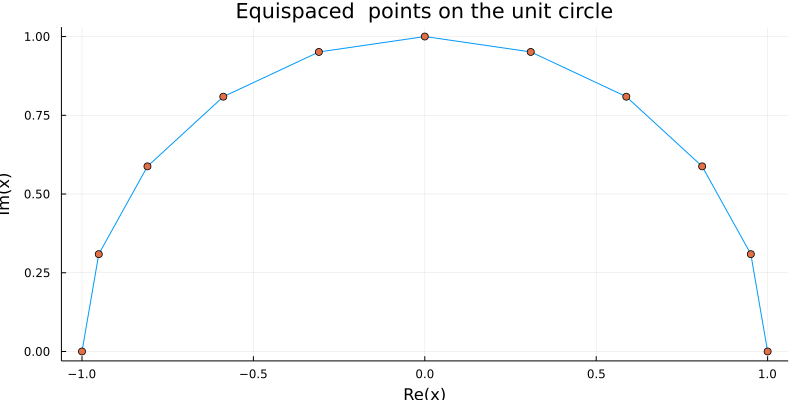

In [3]:
n = 10
tt= range(0,stop=π,length=n+1)
zz =exp.(im*tt)
using Plots
plot(zz,
    title = "Equispaced  points on the unit circle",
    legend = false,
    size = (800,400),
)
scatter!(zz)

そして、各Chebyshev点を計算し、上のプロットに重ね合わせると各 $z_j$ の実部に対応していることが分かる。

In [4]:
function chebpts(n, a=-1, b=1) # n: maximum order of Chebyshev polynomials
    tt = range(0, stop=π, length=n+1)
    x = cos.(tt)
    return (1.0 .- x).*a/2 + (1.0 .+ x).*b/2
end

chebpts (generic function with 3 methods)

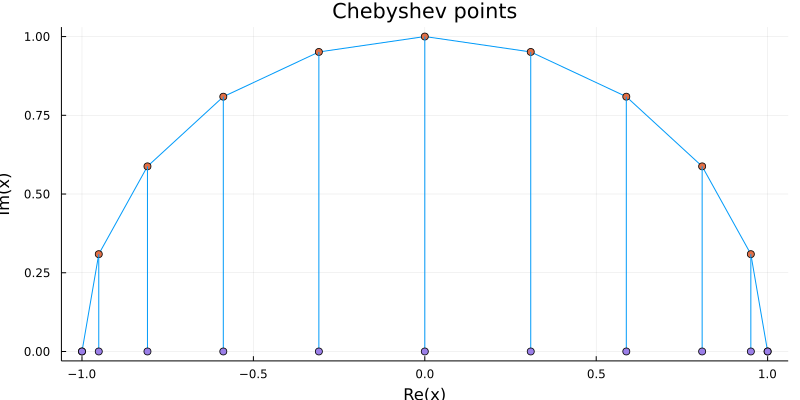

In [5]:
x = chebpts(n)
for j = 2:n
    plot!([x[j];zz[j]],
        title = "Chebyshev points",
        legend = false,
        color=1,
    )
end
scatter!(x.+0*im)

さらにChebyshev多項式を重ねてみると、Chebyshev多項式の性質が見える。

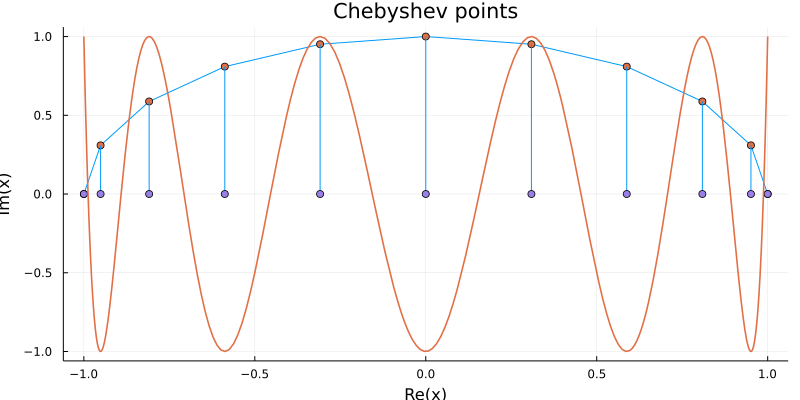

In [6]:
Tₙ = Fun(Chebyshev(),[zeros(n);1.])
plot!(Tₙ, -1,1, color=2,line= 1.6,)

すなわちChebyshev点においてChebyshev多項式は極値($\pm 1$)を取る。

## Chebyshev級数の特徴3：Fourier級数との関係

Chebyshev級数はFourier級数への変換が容易である ("A Chebyshev polynomial expansion is merely a Fourier cosine series in disguise", J.P. Boyd)。

$$
\begin{align*}
f(x)&=c_0+2\sum^{\infty}_{n=1}c_nT_n(x) \\
&= c_0+2\sum^{\infty}_{n=1}c_n\cos(n\theta),\quad (x=\cos\theta)\\
&= \sum^{\infty}_{k=-\infty}c_{|k|}e^{ik\theta}.
\end{align*}
$$

ここで

$$
\begin{align*}
c_k = \frac{1}{2\pi}\int_0^{2\pi} f(\cos\theta) e^{-i k\theta}d\theta\quad(k\in \mathbb{Z}) && (c_{-k}=c_k)
\end{align*}
$$

が成り立つため、Fourier 係数 $c_{|k|}$ は計算できる。 この $(c_n)_{n\ge 0}$ を **One-sided Chebyshev 係数**とよぶ。
もう少し詳しく言うと、$|k|<M$ の範囲で打ち切った Chebyshev 係数 $\bar{c}_k$ は離散フーリエ変換を用いて

$$
	c_k \approx  \frac1{2M-2}\sum_{j=0}^{2M-3} f(\cos\theta_j) e^{-\pi i\frac{kj}{M-1}}=\bar{c}_k\quad \left(\theta_j=\frac{\pi j}{M-1},~h=\frac{\pi}{M-1},~|k|<M\right)
$$

と近似できる。ここで $f(\cos\theta_j)$ はChebyshev点 $x_j=\cos\theta_j$ における関数 $f$ の値を表す。


## Chebyshev係数の計算方法
試しに $f(x)=\exp\left(\mathop{\mathrm{erf}}(x^2)+x^5\right)\sin(3\pi x) + x$ ($x\in[-1,1]$) のChebyshev係数を計算するコードを以下に載せる。

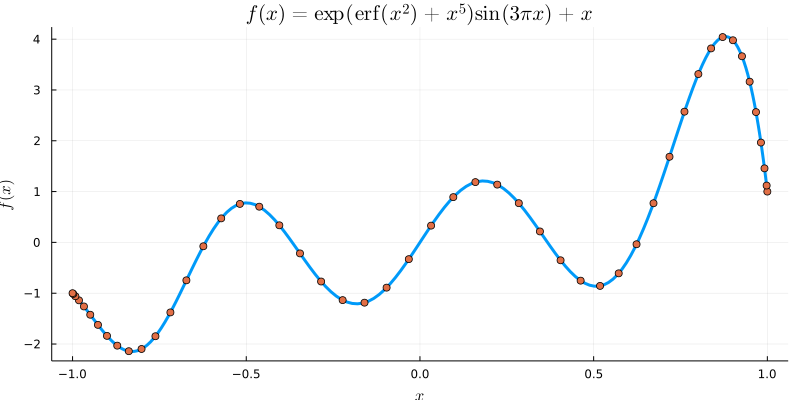

In [7]:
using SpecialFunctions 
M = 50# number of Chebyshev polynimals
fc = Fun(x->exp(erf(x^2)+x.^5).*sin(3*pi*x) + x, Chebyshev(),M)
n = ncoefficients(fc) - 1 # maximum order of Chebyshev polynomials (n = M-1)

plot(fc,
    xlabel     = "\$x\$",
    ylabel     = "\$f(x)\$",
    line       = 3,
    title      = "\$f(x) = \\exp\\,(\\mathrm{erf}\\,(x^2)+x^5)\\sin\\,(3\\pi x) + x\$", 
    size       = (800,400),
    legend     = false,
)

cpts = chebpts(n)
fvals = fc.(cpts)
scatter!(cpts,fvals)

Chebyshev点における関数値からChebyshev係数を計算する方法は以下の通りになる。出力結果から`ApproxFun.jl`で計算したチェビシェフ係数と一致することが確認できる。

In [8]:
using FFTW
FourierCoeffs = real(fftshift(fft([fvals;reverse(fvals[2:end-1])])))/(2M-2)
Cheb_onesided = reverse(FourierCoeffs[1:M])
Cheb_twosided = similar(Cheb_onesided)
Cheb_twosided[1] = Cheb_onesided[1]
Cheb_twosided[end] = Cheb_onesided[end]
Cheb_twosided[2:end-1] = 2*Cheb_onesided[2:end-1]
reshape([coefficients(fc);Cheb_twosided],M,2)

50×2 Matrix{Float64}:
  0.287573      0.287573
  1.93311       1.93311
  0.364321      0.364321
  0.356239      0.356239
 -0.0820947    -0.0820947
 -0.688727     -0.688727
 -0.34171      -0.34171
 -1.00735      -1.00735
 -0.229165     -0.229165
  0.520943      0.520943
 -0.0247779    -0.0247779
 -0.116649     -0.116649
  0.0263973     0.0263973
  ⋮            
 -5.42512e-12  -5.42508e-12
  9.31526e-12   9.3154e-12
 -4.55051e-12  -4.55042e-12
  1.0937e-12    1.09382e-12
  1.31131e-13   1.31432e-13
 -2.5512e-13   -2.55161e-13
  1.23554e-13   1.23479e-13
 -2.9825e-14   -2.95999e-14
 -3.37508e-15  -3.6204e-15
  6.08402e-15   5.78222e-15
 -3.48166e-15  -3.41224e-15
  5.32907e-16   4.80341e-16

一方で、上記のコードは理解のために添字の入れ替えや離散フーリエ変換のスケールの計算部分で無駄な計算をしているので、以下のようにシンプルにコードを書き直す。

In [9]:
valsUnitDisc = [fvals;reverse(fvals[2:end-1])]
FourierCoeffs = real(fft(valsUnitDisc))
ChebCoeffs = FourierCoeffs[1:n+1]/n
ChebCoeffs[1] = ChebCoeffs[1]/2
ChebCoeffs[end] = ChebCoeffs[end]/2
reshape([ChebCoeffs; Cheb_twosided],n+1,2)

50×2 Matrix{Float64}:
  0.287573      0.287573
  1.93311       1.93311
  0.364321      0.364321
  0.356239      0.356239
 -0.0820947    -0.0820947
 -0.688727     -0.688727
 -0.34171      -0.34171
 -1.00735      -1.00735
 -0.229165     -0.229165
  0.520943      0.520943
 -0.0247779    -0.0247779
 -0.116649     -0.116649
  0.0263973     0.0263973
  ⋮            
 -5.42509e-12  -5.42508e-12
  9.31542e-12   9.3154e-12
 -4.55039e-12  -4.55042e-12
  1.09373e-12   1.09382e-12
  1.31432e-13   1.31432e-13
 -2.55085e-13  -2.55161e-13
  1.23468e-13   1.23479e-13
 -2.9618e-14   -2.95999e-14
 -3.60851e-15  -3.6204e-15
  5.81847e-15   5.78222e-15
 -3.40317e-15  -3.41224e-15
  4.80341e-16   4.80341e-16

以上の計算方法を関数の形でまとめると以下のようになる。

In [10]:
function chebcoeffs(f,M,I=[-1;1])
    a = I[1]; b = I[2]
    n = M-1
    cpts  = chebpts(n, a, b)
    fvals = f.(cpts)
    FourierCoeffs = real(fft([fvals;reverse(fvals[2:end-1])]))
    ChebCoeffs = FourierCoeffs[1:n+1]/n
    ChebCoeffs[1] = ChebCoeffs[1]/2
    ChebCoeffs[end] = ChebCoeffs[end]/2
    return ChebCoeffs # return Two-sided Chebyshev
end

chebcoeffs (generic function with 2 methods)

上に示したのは関数 $f$ とChebyshev多項式の数 $M$ を与えると (Two-sided) Chebyshev係数の値を出力するコードである。
一方で、関数の十分な近似を得られる $M$ の値は近似する関数によって異なり、適切な多項式の数 $M$ を決めることは自明ではない。そこで適切な $M$ を見つけて Chebyshev 係数を計算する方法を以下では考える。

まず、上で定義した `chebfoeffs` 関数を用いると与えた関数（例えば $f(x) = e^x$）に対してChebyshev多項式の数 $M$ を指定して、Chebyshev 係数を計算することができる。

In [11]:
f(x) = exp(x)
chebcoeffs(f,2^3+1) # M=9として計算

9-element Vector{Float64}:
 1.2660658777520082
 1.13031820798497
 0.27149533953407795
 0.04433684984870376
 0.005474240443132938
 0.0005429263368934845
 4.497787354390548e-5
 3.2094732340670618e-6
 1.9921248062271246e-7

得られた Chebyshev 係数の末尾に注目して、末尾が十分小さければ、関数の良い近似が得られたと判断できる。サイズ $M$ が十分大きければ、Chebyshev係数は十分小さな値に収束していくことが予想されるが、いま 8次の Chebyshev 多項式(M=9)を用いてChebyshev係数の末尾を見ると、約 $10^{-7}$ 程度までしか小さくなっていない。これでは係数が十分に小さいとは言えないため、$M$ を増やして再度計算する。Chebyshev 係数の末尾が単位相対丸め ($2^{-52}$) と同程度に低下するまで $M$ を17、33、65 ($2^i+1$, $i=3,4,\dots$)というように増やす。

In [12]:
chebcoeffs(f,2^4+1)

17-element Vector{Float64}:
  1.2660658777520082
  1.13031820798497
  0.27149533953407656
  0.04433684984866383
  0.005474240442093689
  0.0005429263119138619
  4.497732295428991e-5
  3.1984364623482975e-6
  1.9921248062271246e-7
  1.1036771718764271e-8
  5.505896155666434e-10
  2.49796225371135e-11
  1.0392494156907794e-12
  3.9929864970034146e-14
  1.4155343563970746e-15
 -1.1102230246251565e-16
 -1.1102230246251565e-16

$f(x) = e^x$ の場合、$M=17$ でChebyshev係数が $10^{-15}$ 程度まで低下したと判断された。以下の`cheb`関数は、$M$ を $3,5,9,17,33\dots$ と増やしていき、Chebushev係数の末尾が与えた許容誤差を下回るよう $M$ を設定しChebyshev係数を計算するコードである。

In [13]:
function cheb(f,I=[-1;1];tol = 5e-15,Nmax = 10000)
    a = I[1]; b = I[2]; m = 0.5*(a+b); r = 0.5*(b-a); x = rand(5)
    x1 = m .+ x*r; x2 = m .- x*r
    if f.(x1) ≈ f.(x2)
        odd_even = 1 # even function: 1
    elseif f.(x1) ≈ -f.(x2)
        odd_even = -1 #  odd function: -1
    else
        odd_even = 0 # otherwise: 0
    end
    i = 3
    schbc = 0 # sampling chebyshev coefficients
    while true
        schbc = chebcoeffs(f,2^i+1,I)
        if all(abs.(schbc[end-2:end]) .< tol) || (2^i+1 > Nmax) 
            break
        end
        i += 1
    end    
    M = findlast(abs.(schbc) .> tol)
    # cc = schbc[1:M]
    cc = chebcoeffs(f,M,I)
    if odd_even == 1 # even function
        cc[2:2:end] .= 0
    elseif odd_even == -1 # odd function
        cc[1:2:end] .= 0
    end
    return cc # return Two-sided Chebyshev
end

cheb (generic function with 2 methods)

例えば下記のような

$$f(x) = \frac{1}{1+1000(x+0.5)^2}+\frac{1}{\sqrt{1+1000(x-0.5)^2}}$$

において`cheb`関数を計算すると $M=829$ でChebyshev係数が設定した許容誤差 ($5$×$10^{-15}$) を下回り、補間に適したChebyshev係数を計算することができる。

In [14]:
f(x) = 1/(1+1000*(x+.5)^2)+1/sqrt(1+1000*(x-.5)^2)
Cheb_twosided=cheb(f)

829-element Vector{Float64}:
  0.14224398378782516
  0.04823089592032271
 -0.09011322770246134
 -0.04210060298950601
 -0.08260487783403558
  0.011127573668779166
  0.13570878592379218
  0.007445949956064092
 -0.057614692030628425
 -0.0072776440862370815
 -0.0546245068243461
  0.001347239867888251
  0.09513273542589006
  ⋮
 -3.896641463602859e-15
 -7.489446529403713e-15
  9.405251671413887e-15
 -5.324779801197369e-15
 -5.187476857089137e-15
  1.2219962025632642e-14
 -4.121770021374072e-15
 -6.461819807093665e-15
  8.97403461257397e-15
 -5.753851501535594e-15
 -4.541723948080109e-15
  5.955515200694559e-15

さらに $f(x)$ のChebyshev係数の推移を以下のグラフに表す。

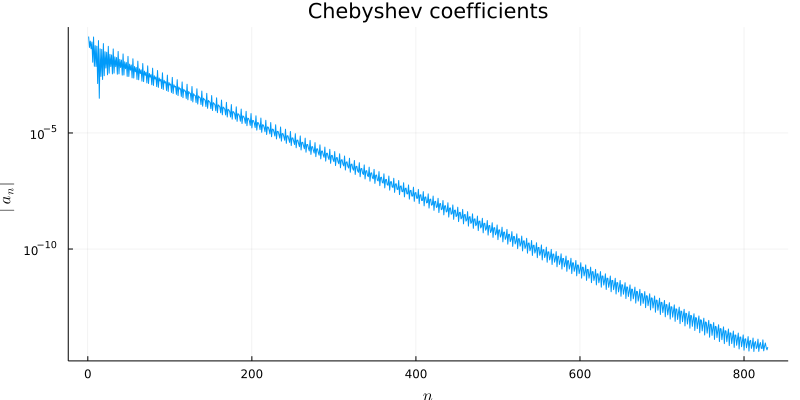

In [15]:
plot(abs.(cheb(f)),
    yscale=:log10,
    legend = false,
    xlabel="\$n\$",
    ylabel="\$|a_n\\,|\$",
    title="Chebyshev coefficients",
    size = (800,400)
)
# savefig("chebcoeffs.pdf")

## Chebyshev係数から元の関数の概形を求める
これまでは、任意の関数における補間に適切なChebyshev多項式の数 $M$ とChebyshev係数の値を求めてきたが、ここでは反対にChebyshev係数の値から元の関数の概形を求めていく。
以下の`plot_cheb`関数では、two-sidedのChebyshev係数を入力することで、Chebyshev級数の定義に従ってChebyshev点における関数値から元の関数の概形をプロットする関数である。

In [16]:
function plot_cheb(ChebCoeffs_twosided;I=[-1,1],title="") # Input: Two-sided Chebyshev
    M = length(ChebCoeffs_twosided) # M: size of chebyshev
    a = I[1]; b = I[2]; ChebCoeffs_onesided = zeros(size(ChebCoeffs_twosided))
    k = 0:M-1
    ξⱼ = range(-1, stop=1, length=5000)
    xc = (1.0 .- ξⱼ)*a/2 + (1.0 .+ ξⱼ)*b/2 # Chebyshev points in [a,b]
    fxc = cos.(Vector(k)' .* acos.(ξⱼ)) * ChebCoeffs_twosided
    plot(xc, fxc, label="plot_cheb", title=title, size=(800,400),
        xlabel="\$x\$", ylabel="\$f(x)\$")
end

plot_cheb (generic function with 1 method)

実際に$f(x) = \frac{1}{1+1000(x+0.5)^2}+\frac{1}{\sqrt{1+1000(x-0.5)^2}}$のChebyshev係数を`cheb`関数を用いて計算し、そのChebyshev係数から`plot_cheb`関数を用いて$f(x)$の概形を求めると

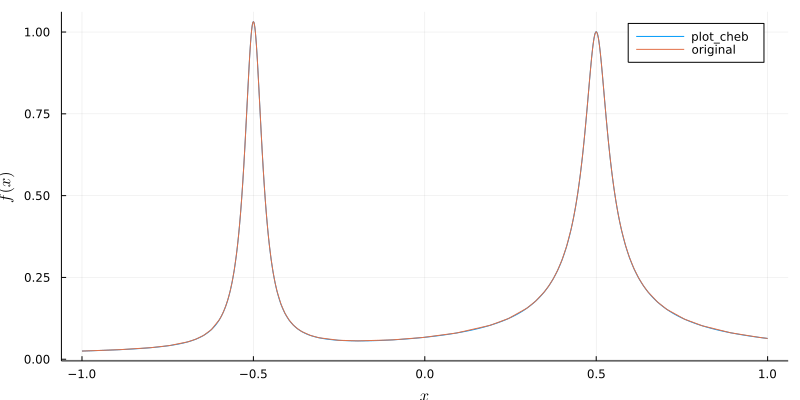

In [17]:
f(x) = 1/(1+1000*(x+.5)^2)+1/sqrt(1+1000*(x-.5)^2)
cc = cheb(f)
plot_cheb(cc)
plot!(f,label="original")

元の関数と重ね合わせてみてもある程度精度よく描画できていることがわかる。

## 重心補間式(Barycentric interportion formula)

上記の方法よりも少ない計算量でChebyshev級数の関数値を評価する方法として、重心補間式 (Barycentric interportion formula) がある。重心補間式は、数値的に安定しておりChebyshev以外の点の集合にも一般化できる。

まず、重心補間式の理解のためラグランジュの表現について考える。$x_j$における関数値を$f_j$とするとn次多項式で補間条件

$$p(x_j)=f_j$$

を満たす多項式 $p(x)$ を探す問題は、Well-posedで一意な解を持つ。この $p$ は以下のように与えられる。

$$ p(x)=\sum^{n}_{j=0}f_j \ell_j(x), \quad \ell_j(x)=\prod_{\substack{k=0 \\ k\neq j}}^{n}\frac{(x-x_k)}{(x_j-x_k)}.$$

この表現を**ラグランジュの表現**という。
また $\ell_j$ は $x_j$ に対するラグランジュ基底多項式と呼ばれ以下のように与えられる。

$$\ell_j(x_k)=\begin{cases}1,\quad k=j\\0, \quad  k\neq j \end{cases} \quad j,k=0,1,...,n $$

そして、重心重みを以下のように定義すると

$$ \lambda_j=\frac{1}{\prod_{k\neq j}(x_j-x_k)}, \quad j=0,1...,n.$$

さらに $\lambda_j=\frac{1}{\ell'(x_j)}$ となるため、$\ell_j$ は

$$ \ell_j(x)=\ell(x)\frac{\lambda_j}{x-x_j} $$
とかける。また $p$ は

$$ p(x)=\ell(x)\sum_{j=0}^{n}\frac{\lambda_j}{x-x_j}f_j$$

であり、ラグランジュ基底多項式の総和は1となるから以下の式が成り立つ。

$$ 1=\sum_{j=0}^{n}\ell_j(x)=\ell(x)\sum_{j=0}^{n}\frac{\lambda_j}{x-x_j}. $$

よって $p(x)$ についての式を上式で割ると、$\ell(x)$ が相殺されて

$$p(x)=\left.\sum_{j=0}^{n}\frac{\lambda_j f_j}{x-x_j}\middle/\sum_{j=0}^{n}\frac{\lambda_j}{x-x_j} \right.\quad with \; p(x)=f_j \; (x=x_j). $$

上記のような $p(x)$ を**重心補間式**という。重心補間式は、重み $\lambda_j$ が事前にわかっていれば、少ない計算量で関数値の評価ができる。今回考えているChebyshev点上における重心重み $\lambda_j$ は以下のように知られている。

$$ \lambda_j=(-1)^j \delta_j,\quad \delta_j=\begin{cases}\frac{1}{2},\quad j=0~\mbox{or}~j=n \\ 1,\quad \mbox{otherwise} \end{cases}.$$

これによりChebyshev点上における関数値を用いると、重心補間式は以下のようになる。

$$ p(x)=\left. \sum_{j=0}^{n}'\frac{(-1)^j f_j}{x-x_j}\middle/ \sum_{j=0}^{n}'\frac{\lambda_j}{x-x_j}\right.\quad with \; p(x)=f_j \;(x=x_j).$$

※$\sum$記号につく $'$ は $j=0,n$ のときに値を $1/2$ 倍することを意味する。

重心補間式を用いて関数

$$f(x) = \frac{1}{1+1000(x+5)^2}+\frac{1}{\sqrt{1+1000(x-5)^2}}$$

の概形を1000次のChebyshev点上で評価し、描画すると

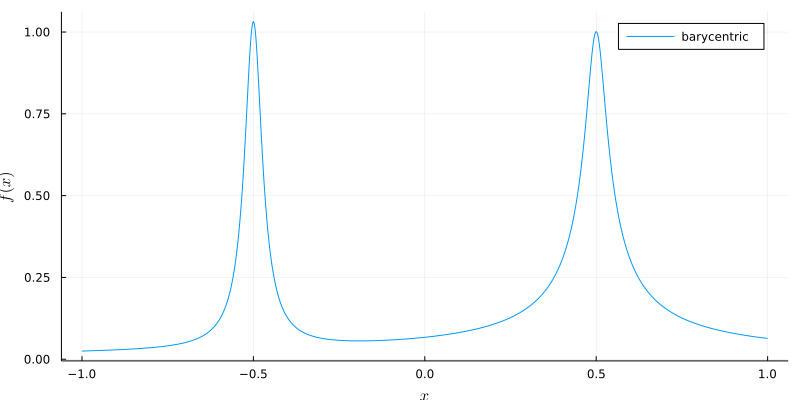

In [18]:
n=1000
f(x) = 1/(1+1000*(x+.5)^2)+1/sqrt(1+1000*(x-.5)^2)
xc = chebpts(n)
fxc = f.(xc)
λ = [1/2; ones(n-1); 1/2] .* (-1).^(0:n)
x = range(-1,stop=1,length=5000)
numer = zeros(size(x))
denom = zeros(size(x))
exact = zeros(Bool,size(x))

for j = 1:n+1
   xdiff = x .- xc[j]
   temp = λ[j] ./ xdiff
   numer += temp * fxc[j]
   denom += temp
   exact[xdiff.==0] .= true
end

fx = numer ./ denom
jj = findall(exact)
fx[jj] = f.(x[jj])

plot(x,fx,size=(800,400),xlabel="\$x\$",ylabel="\$f(x)\$",label="barycentric")

重心補間式を用いてChebyshev係数から関数の概形を描画する`plot_cheb_bc`関数を以下のように作成する。

In [19]:
function plot_cheb_bc(ChebCoeffs_twosided;n=200,I=[-1,1],title="") # Input: Two-sided Chebyshev
    M = length(ChebCoeffs_twosided) # M: size of chebyshev
    a = I[1]; b = I[2]; 
    k = 0:M-1
    ξⱼ = chebpts(n)
    xc = (1.0 .- ξⱼ)*a/2 + (1.0 .+ ξⱼ)*b/2 # Chebyshev points in [a,b]
    fxc = cos.(Vector(k)' .* acos.(ξⱼ)) * ChebCoeffs_twosided
    # interpolation via barycentric formula
    ξ = range(-1,stop=1,length=5000)
    x = (1.0 .- ξ)*a/2 + (1.0 .+ ξ)*b/2
    λ = [1/2; ones(n-1); 1/2] .* (-1).^(0:n)

    numer = zeros(size(x))
    denom = zeros(size(x))
    exact = zeros(Bool,size(x))

    for j = 1:n+1
        xdiff = x .- xc[j]
        temp = λ[j] ./ xdiff
        numer += temp * fxc[j]
        denom += temp
        exact[xdiff.==0] .= true
    end

    fx = numer ./ denom
    jj = findall(exact)
    fx[jj] = f.(x[jj])
    plot(x, fx, label="plot_cheb_bc", title=title, xlabel="\$x\$",ylabel="\$f(x)\$",size=(800,400))
end

plot_cheb_bc (generic function with 1 method)

`plot_cheb_bc`関数を用いて描画し、元の関数の描画と比較する。

  0.076859 seconds (1.47 k allocations: 31.792 MiB, 10.40% gc time)
  0.250654 seconds (1.97 M allocations: 136.886 MiB, 4.04% gc time, 96.04% compilation time)
  0.020859 seconds (3.91 k allocations: 33.232 MiB, 51.23% gc time)


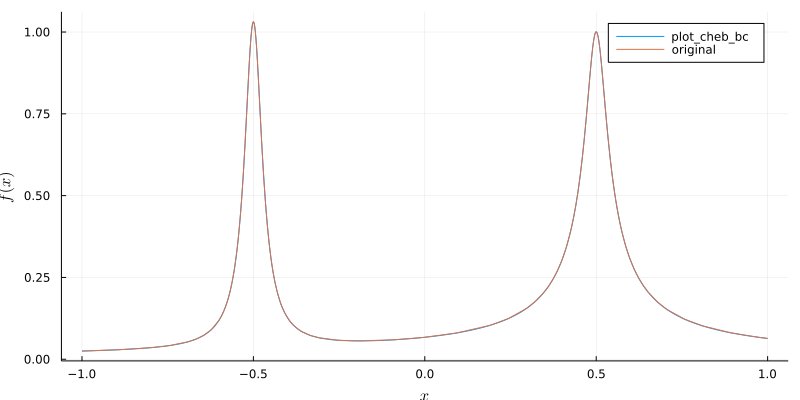

In [20]:
# f(x) = exp(x)
# f(x) = 1/(1+1000*(x+.5)^2)+1/sqrt(1+1000*(x-.5)^2)
fc = cheb(f)
@time plot_cheb(fc)
@time plot_cheb_bc(fc)
@time plot_cheb_bc(fc)
plot!(f,-1,1,label="original")

`plot_cheb`関数も`plot_cheb_bc`関数も`cheb`関数をもとに得られる829個のChebyshev係数から関数の概形を求めている。描画した関数の概形はほぼ同じであるが、`plot_cheb_bc`関数の方が計算速度が（この場合は）だいぶ速いことがわかる。

## 応用例：Mackey-Glass 方程式のChebyshev級数を使った求積

$$
\frac{d x}{d t}=\beta \frac{x_{\tau}}{1+x_{\tau}^{n}}-\gamma x, \quad \gamma, \beta, n>0
$$

で与えられるMackey-Glass方程式を考える。まず、JuliaのDDEを用いて、パラメータを $\tau=2$, $\beta=2$, $\gamma=1$, $n=9.65$, $u_0=0.5$ と設定した、Mackey-Glass方程式の解を計算し、描画する。

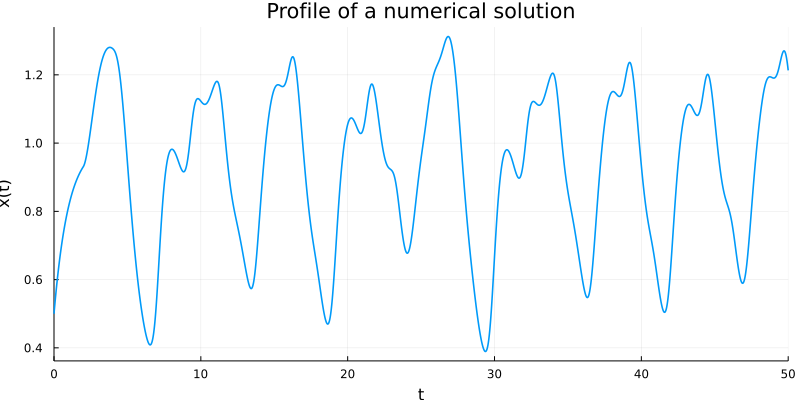

In [21]:
using DifferentialEquations

function MackeyGlass(du, u, h, p, t)
  β, γ, n, τ = p
  hist = h(p, t-τ)[1]
  du[1] = β * hist / (1.0 + hist ^ n) - γ*u[1]
end

h(p, t) = 0.5
τ = 2.0
lags = [τ]
β = 2.0; γ = 1.0; n = 9.65
p = (β, γ, n, τ)
tspan = (0.0, 50.0)
u0 = [0.5]

prob = DDEProblem(MackeyGlass, u0, h, tspan, p; constant_lags=lags)
alg = MethodOfSteps(Tsit5())
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8) 
using Plots
plot(sol,
    xlabel = "t",                             # X軸のラベル
    ylabel = "x(t)",                   # Y軸のラベル
    line   = 1.6,                                    # 線幅
    title  = "Profile of a numerical solution",   # タイトル
    size   = (800,400),                              # プロットのサイズ
    legend = false,                                  # 凡例は今回は消す
)

次にDDEを用いて求めた解のChebyshev係数を計算する関数`ddecheb`関数を作成し、Mackey-Glass方程式の解のTwo-sided Chebyshev係数を求める。また、Chebyshev係数の推移を描画する。

In [22]:
function ddechebcoeffs(f,M,I=[-1;1])
    a = I[1]; b = I[2];
    n = M-1
    cpts  = chebpts(n, a, b)
    fvals = f(cpts)[1,:]
    FourierCoeffs = real(fft([fvals;reverse(fvals[2:end-1])]))
    ChebCoeffs = FourierCoeffs[1:n+1]/n
    ChebCoeffs[1] = ChebCoeffs[1]/2
    ChebCoeffs[end] = ChebCoeffs[end]/2
    return ChebCoeffs[1:end] # return Two-sided Chebyshev
end
function ddecheb(f,I=[-1;1];tol = 5e-15,Nmax = 10000)
    a = I[1]; b = I[2]; m = 0.5*(a+b); r = 0.5*(b-a); x = rand(5)
    x1 = m .+ x*r; x2 = m .- x*r
    if f(x1)[1,:] ≈ f(x2)[1,:]
        odd_even = 1 # even function: 1
    elseif f(x1)[1,:] ≈ -f(x2)[1,:]
        odd_even = -1 #  odd function: -1
    else
        odd_even = 0 # otherwise: 0
    end
    i = 3
    schbc = 0 # sampling chebyshev coefficients
    while true
        schbc = ddechebcoeffs(f,2^i+1,I)
        if all(schbc[end-2:end] .< tol) || (2^i+1 > Nmax) 
            break
        end
        i += 1
    end    
    M = findlast(abs.(schbc) .> tol)
    cc = ddechebcoeffs(f,M,I)
    if odd_even == 1 # even function
        cc[2:2:end] .= 0
    elseif odd_even == -1 # odd function
        cc[1:2:end] .= 0
    end
    return cc # return Two-sided Chebyshev
end
a0 = ddecheb(sol,tspan)

16385-element Vector{Float64}:
  0.9331615067479998
  0.10474040976724916
  0.015047793238450406
  0.1020161814856855
  0.007857092473358973
  0.09301230417695898
 -0.01669072698166365
  0.08637273880377708
 -0.03623520367828903
  0.04518893219825275
 -0.03379825626483716
 -0.01975853100085806
  0.027369758903564353
  ⋮
  6.230736412926596e-12
 -1.2432487331293096e-11
  1.6110193040708154e-11
 -1.8440112284356935e-11
  1.9257977157405293e-11
 -1.5103813165440183e-11
  6.585364198397059e-12
 -3.8293543683232123e-13
 -4.2570218183879405e-12
  1.2417905679434904e-11
 -1.9104152287896525e-11
  1.0393352845028403e-11

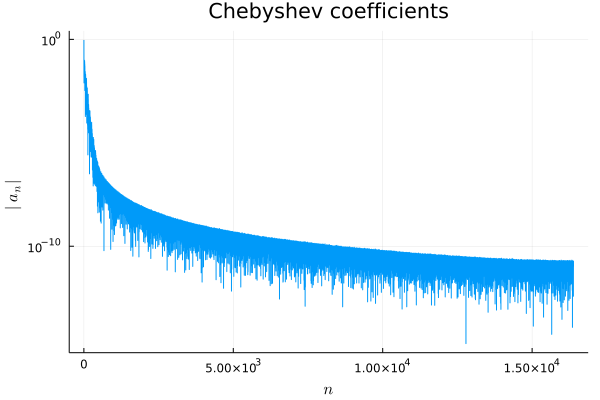

In [23]:
plot(abs.(a0),
    yscale=:log10,
    legend = false,
    xlabel="\$n\$",
    ylabel="\$|a_n\\,|\$",
    title="Chebyshev coefficients"
    # size = (800,400)
)

`ddecheb`関数で計算したChebyshev係数の推移を見ると係数の値が設定した許容誤差を下回ることがなく、十分な近似を行うために大量のChebyshev多項式が必要になることがわかる。これは、遅延項 $\tau$ の存在により $\tau(=2)$ 秒ごとに微分不可能な点が現れることが原因だと考えられる。

一方で、`ddecheb`関数で計算したChebyshev係数を入力し、Chebyshev級数の関数値を計算し解の概形を描画すると

In [24]:
function plot_cheb(ChebCoeffs_twosided;I=[-1,1],title="") # Input: Two-sided Chebyshev
    M = length(ChebCoeffs_twosided) # M: size of chebyshev
    a = I[1]; b = I[2]; ChebCoeffs_onesided = zeros(size(ChebCoeffs_twosided))
    k = 0:M-1
    # ξⱼ = chebpts(5000)
    ξⱼ = range(-1, stop=1, length=5000)
    xc = (1.0 .- ξⱼ)*a/2 + (1.0 .+ ξⱼ)*b/2 # Chebyshev points in [a,b]
    fxc = cos.(Vector(k)' .* acos.(ξⱼ)) * ChebCoeffs_twosided
    plot(xc, fxc, label="plot_cheb", title=title, size=(800,400),
        xlabel="\$t\$", ylabel="\$x(t)\$")
end

plot_cheb (generic function with 1 method)

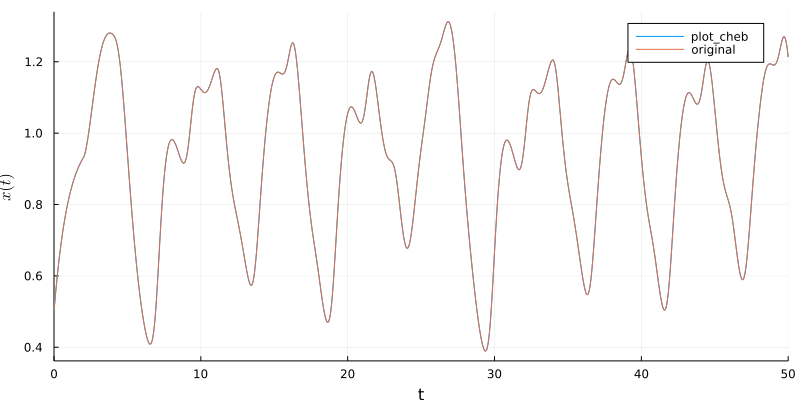

In [25]:
plot_cheb(a0,I=tspan)
plot!(sol,label="original")

見た目上は良い解の近似を得ているが、Chebyshev係数の推移からわかるように十分な精度では補間ができていない。そこで $\tau=2$ ずつの区間で区切ってChebyshev係数を計算してみる。

In [26]:
function integrate_dde(MackeyGlass,tspan,u0,history)
    h(p, t) = history(t)
    τ = 2.0
    lags = [τ]
    β = 2.0; γ = 1.0; n = 9.65
    p = (β, γ, n, τ)
    prob = DDEProblem(MackeyGlass, u0, h, tspan, p; constant_lags=lags)
    alg = MethodOfSteps(Tsit5())
    return solve(prob, alg, reltol=1e-15, abstol=1e-15);
end
function plot_cheb!(ChebCoeffs_twosided;I=[-1,1],title="") # Input: Two-sided Chebyshev
    M = length(ChebCoeffs_twosided) # M: size of chebyshev
    a = I[1]; b = I[2]; ChebCoeffs_onesided = zeros(size(ChebCoeffs_twosided))
    k = 0:M-1
    # ξⱼ = chebpts(5000)
    ξⱼ = range(-1, stop=1, length=5000)
    xc = (1.0 .- ξⱼ)*a/2 + (1.0 .+ ξⱼ)*b/2 # Chebyshev points in [a,b]
    fxc = cos.(Vector(k)' .* acos.(ξⱼ)) * ChebCoeffs_twosided
    plot!(xc, fxc, legend=false, title=title, size=(800,400), line=1.6,
        xlabel="\$t\$", ylabel="\$x(t)\$")
end

plot_cheb! (generic function with 1 method)

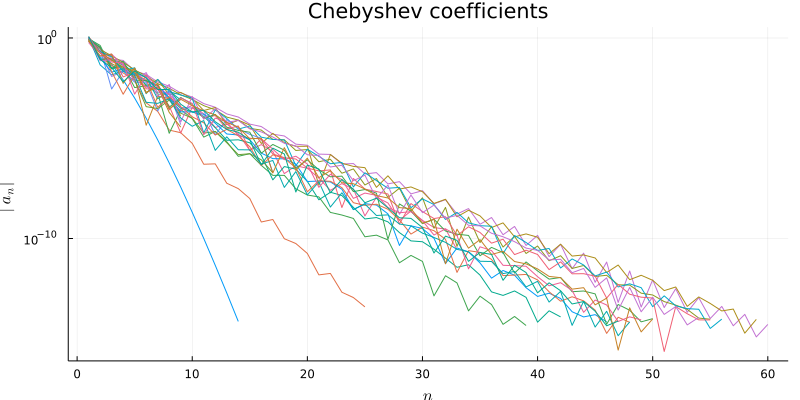

In [27]:
tspan = (0.0,2.0)
u0 = [0.5]
prev(t) = [0.5]
plt =plot()
for t1=2:2:50
    u = integrate_dde(MackeyGlass,tspan,u0,prev)
    a = ddecheb(u,tspan)
    # plot_cheb!(a,I=tspan)
    plot!(plt,
        abs.(a),
        yscale=:log10,
        legend = false,
        xlabel="\$n\$",
        ylabel="\$|a_n\\,|\$",
        title="Chebyshev coefficients",
        size = (800,400)
    )
    tspan = (t1,t1+2)
    u0 = u(t1)
    prev(t) = u(t)
end
plot!(plt)

遅延 $\tau=2$ ごとに計算したChebyshev係数の推移を見てみると、どの区間でも解の近似を行うための数十個のChebyshev係数で設定した許容誤差を下回ることがわかる。このように遅れ $\tau$ ごとに計算する方法を**ステップ法** (Method of steps)という。

本資料は以下のような文献・Web ページ等を参考にこの文章は書いています。

### 参考文献

1. John P. Boyd, Chebyshev and Fourier Spectral Methods, Dover Publications, 2001.<br>
(Chebyshev級数はFourier級数の変装だ！というスペクトル法の教科書、FFTを使って高速に数値計算できることが紹介されている)
1. Lloyd N. Trefethen, Approximation Theory and Approximation Practice, Extended Edition, SIAM, 2019.<br>
(補間理論のマニアックな教科書、Chebfunを使って実例を見せながら理解させる書き方はとても面白く、分かりやすい。本記事のお手本となっている)
1. 石岡圭一, スペクトル法による数値計算入門, 東京大学出版会, 2004.<br>
(スペクトル法を紹介している唯一の和書（たぶん）、FFTやODEの数値解法など丁寧に紹介されている)
1. Jean-Paul Berrut and Lloyd N. Trefethen, Barycentric Lagrange Interpolation. SIAM Review 46 (3): 501–517, 2004.<br>
(重心補間式のレビュー論文、重心補間式がいかに数値計算と相性が良い（特にChebyshev補間と）のかを示している)
1. J.C. Mason and D.C. Handscomb, Chebyshev Polynomials (1st ed.), Chapman and Hall/CRC, 2002.<br>
(チェビシェフ多項式をもの凄く詳しく説明している教科書。辞書的に調べる使い方で無敵を誇る)



<div align="right">近藤慎佑, <a href="http://www.risk.tsukuba.ac.jp/~takitoshi/">高安亮紀</a>，2022年3月4日</div>